# Hurricane Frequencies between 1851-present

This script plots the hurricane frequency as a function of year between 1851-present as well as 1972-present. 

Over the full period 1851-present there is an apparent increase in the frequency of hurricanes, but this apparent increase is caused by a sampling bias where hurricanes were missed unless they hit land until the advent of satellites around 1972 (e.g. Vecchi et al. 2021). When one only considers the frequency of hurricanes between 1972-present, there is no statistically significant change in the frequency of hurricanes.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [3]:
df = pd.read_parquet('data/hurdat2.parquet')

In [4]:
n_cyclones = df.groupby('Year')['CycloneID'].nunique().reset_index()

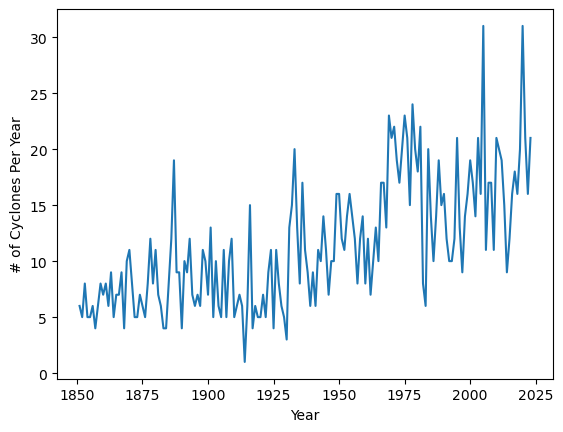

In [6]:
sns.lineplot(data=n_cyclones, x='Year', y='CycloneID')
plt.ylabel('# of Cyclones Per Year');

There is an apparent increase in the number of cyclones per year in the Atlantic basin, however this is due to sampling differences over the years. In early times, hurricanes were only known about and recorded if they made landfall.

<AxesSubplot: xlabel='Year', ylabel='CycloneID'>

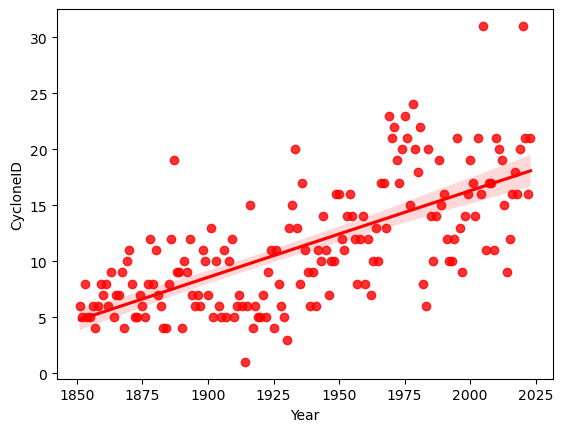

In [7]:
sns.regplot(data=n_cyclones, x='Year', y='CycloneID', scatter=True, color='red')

Recent work by Vecchi et al. (2021) suggests that reliable data for hurricane frequency begins around 1972, and coincides with the advent of satellite imaging. Unless an Atlantic hurricane made landfall, it was not known about, so the true number of hurricanes in the past was higher than the number recorded in the hurdat2 dataset. 

Below I will repeat this with data from 1972-present.

<AxesSubplot: xlabel='Year', ylabel='CycloneID'>

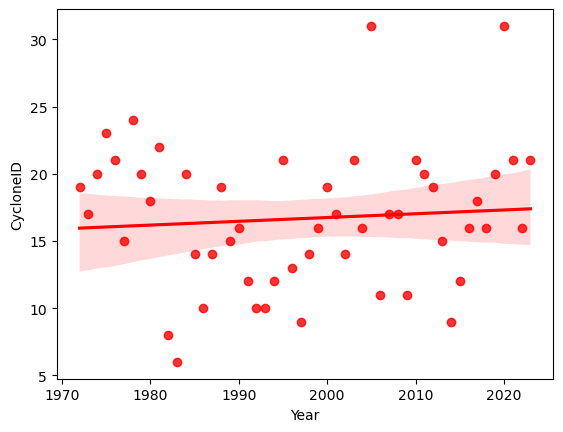

In [8]:
sns.regplot(data=n_cyclones.loc[n_cyclones.Year >= 1972], x='Year', y='CycloneID', scatter=True, color='red')

C:\Users\patri\AppData\Local\Temp\ipykernel_13972\2310989315.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_cyclones_filtered['15yr_avg'] = n_cyclones_filtered['CycloneID'].rolling(window=15).mean()


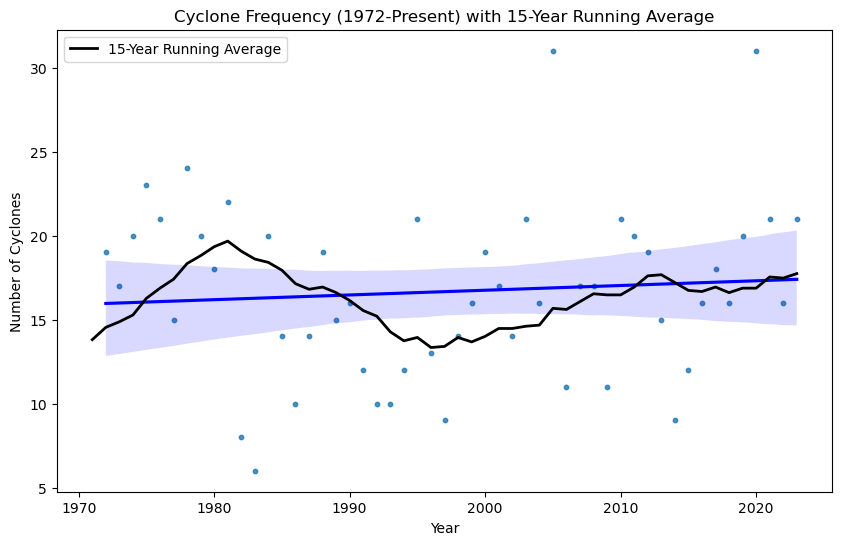

In [9]:
n_cyclones_filtered = n_cyclones[n_cyclones['Year'] >= 1972-15]

# Create a 15-year rolling average for CycloneCount
n_cyclones_filtered['15yr_avg'] = n_cyclones_filtered['CycloneID'].rolling(window=15).mean()

# Plotting the regplot
plt.figure(figsize=(10, 6))
sns.regplot(x='Year', y='CycloneID', data=n_cyclones_filtered.loc[n_cyclones['Year'] >= 1972], scatter_kws={"s": 10}, line_kws={"color": "blue"})

# Adding the 15-year running average line in black
plt.plot(n_cyclones_filtered['Year'], n_cyclones_filtered['15yr_avg'], color='black', linewidth=2, label='15-Year Running Average')

# Customize and show plot
plt.xlabel('Year')
plt.ylabel('Number of Cyclones')
plt.title('Cyclone Frequency (1972-Present) with 15-Year Running Average')
plt.legend();

Let's fit a linear regression model to see if the slope measured is consistent with 0.

In [11]:
n_cyclones_filtered = n_cyclones[n_cyclones['Year'] >= 1972]

# Perform linear regression using scipy's linregress function
slope, intercept, r_value, p_value, std_err = linregress(n_cyclones_filtered['Year'], n_cyclones_filtered['CycloneID'])

# Print results to evaluate if the slope is consistent with no slope
print(f"Slope: {slope}")
print(f"P-value: {p_value}")

# Decision based on p-value
if p_value > 0.05:
    print("The slope is not significantly different from zero (consistent with no slope).")
else:
    print("The slope is significantly different from zero.")

Slope: 0.028131136344232904
P-value: 0.5591350824380359
The slope is not significantly different from zero (consistent with no slope).


The linear fit of data since 1972 is statistically consistent with no increase with time.